# Submission of Detecting Disaster Tweets 

This file contains ML Models for predicting labels of test dataset.

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading data
data_train=pd.read_csv('train.csv')
data_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [3]:
#Adding length of all characters of tweet to dataset
data_train['length']  = data_train['text'].str.len()
#Adding words quantity to dataset
data_train['wordqty'] = data_train['text'].str.split().str.len()
#Adding average character per word to dataset
data_train['avg char per words']=data_train['length']/data_train['wordqty']
data_train

,id,keyword,location,text,target,length,wordqty,avg char per words
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,5.307692
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,5.428571
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,6.045455
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,8.125000
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,5.500000
...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11,7.545455
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20,6.250000
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8,8.125000
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19,7.210526


In [4]:
#Correlation among columns and find most useful columns with target value
corr = data_train.corr()
corr.style.background_gradient(cmap='PuOr_r')
#None of them is useful as shown in the visuals from EDA file

,id,target,length,wordqty,avg char per words
id,1.000000,0.060781,0.017393,0.006420,0.015716
target,0.060781,1.000000,0.181817,0.039966,0.182517
length,0.017393,0.181817,1.000000,0.837386,0.065285
wordqty,0.006420,0.039966,0.837386,1.000000,-0.430094
avg char per words,0.015716,0.182517,0.065285,-0.430094,1.000000


In [5]:
#So We should focus only text columns
#Seperate x and y
x=data_train['text']
y=data_train['target']
print('Length of x:',len(x),'\nLength of y:',len(y))
print('Length of x Null values:',np.sum(pd.isnull(x)),'\nLength of y Null values:',np.sum(pd.isnull(y)))
#So We have not any Nan values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
#Check number of Train and test data also
print('Length of train dataset',len(x_train),'\nLength of test dataset:',len(x_test))

Length of x: 7613 
Length of y: 7613
Length of x Null values: 0 
Length of y Null values: 0
Length of train dataset 6090 
Length of test dataset: 1523


In [6]:
#Convering data from text to matrix of tokens using CountVectorizer
cv=CountVectorizer()
X_train=cv.fit_transform(x_train)
X_test = cv.transform(x_test)

## KNN

In [7]:
#Our first model is KNN. In order to find the best params and accuracy We use GridSearch 
k_range = list(range(1,10))
weight_options = ["uniform", "distance"]

param_knn = dict(n_neighbors = k_range, weights = weight_options)
#print (param_grid)
knn_model = KNeighborsClassifier()

knn_grid = GridSearchCV(knn_model, param_knn, cv = 5, scoring = 'accuracy')
knn_grid.fit(X_train,y_train)
preds_knn=knn_grid.best_estimator_.predict(X_test)
preds_knn=preds_knn.reshape(-1, 1)
knn_acc=accuracy_score(preds_knn,y_test)
print('Best parameters of KNN Model is',knn_grid.best_params_)
print('Accuracy of KNN Model is',knn_acc)

Best parameters of KNN Model is {'n_neighbors': 4, 'weights': 'distance'}
Accuracy of KNN Model is 0.711096520026264


## Decision Tree

In [8]:
#Accuracy of KNN Model is 0.711096520026264. Not that good, so we try others also
#Second model is Decision Tree
param_tree = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_model = DecisionTreeClassifier(random_state=42)
tree_grid = GridSearchCV(tree_model,param_tree, cv=5,scoring='accuracy')
tree_grid.fit(X_train, y_train)
preds_tree=tree_grid.best_estimator_.predict(X_test)
preds_tree=preds_tree.reshape(-1, 1)
tree_acc=accuracy_score(preds_tree,y_test)
print('Best parameters of Decision Tree model is',tree_grid.best_params_)
print('Accuracy of Decision Tree Model is',tree_acc)

Best parameters of Decision Tree model is {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto'}
Accuracy of Decision Tree Model is 0.5994747209455022


## SVM (SVC)

In [9]:
#Accuracy of Decision Tree is also bad, So, we try SVM SVC Model
svm_svc_model = SVC(random_state=42)
param_svm_svc = {'C': [0.1,1,10],
              'gamma': [0.1, 0.01, 0.001]} 
svm_svc_grid = GridSearchCV(svm_svc_model, param_svm_svc, refit = True,scoring='accuracy')
svm_svc_grid.fit(X_train, y_train)
preds_svm_svc=svm_svc_grid.best_estimator_.predict(X_test)
preds_svm_svc=preds_svm_svc.reshape(-1, 1)
svmsvc_acc=accuracy_score(preds_svm_svc,y_test)
print('Best parameters of SVM (SVC) model is',svm_svc_grid.best_params_)
print('Accuracy of SVM (SVC) Model is',svmsvc_acc)

Best parameters of SVM (SVC) model is {'C': 10, 'gamma': 0.01}
Accuracy of SVM (SVC) Model is 0.814182534471438


## SVM (NuSVC)

In [10]:
#Accuraccy is getting better. Let's check other SVM Models
svm_nusvc_model = NuSVC(random_state=42)
nu_range=list(np.arange(0.1,1,0.1))
nu_kernel=['linear', 'poly', 'rbf', 'sigmoid']
param_svm_nusvc = dict(nu = nu_range, kernel = nu_kernel)
svm_nusvc_grid = GridSearchCV(svm_nusvc_model, param_svm_nusvc, refit = True,scoring='accuracy')
svm_nusvc_grid.fit(X_train, y_train)
preds_nusvc=svm_nusvc_grid.best_estimator_.predict(X_test)
preds_nusvc=preds_nusvc.reshape(-1, 1)
nusvc_acc=accuracy_score(preds_nusvc,y_test)
print('Best parameters of SVM (NuSVC) model is',svm_nusvc_grid.best_params_)
print('Accuracy of SVM (NuSVC) Model is',nusvc_acc)

Best parameters of SVM (NuSVC) model is {'kernel': 'linear', 'nu': 0.5}
Accuracy of SVM (NuSVC) Model is 0.8233749179251477


## SVM (LinearSVC)

In [11]:
svm_lin_model = LinearSVC(random_state=42)
param_svm_lin = {'C':np.arange(0.01,100,10)}
svm_lin_grid = GridSearchCV(svm_lin_model,param_svm_lin,cv=5,scoring='accuracy')
svm_lin_grid.fit(X_train,y_train)
preds_svm_lin=svm_lin_grid.predict(X_test)
preds_svm_lin=preds_svm_lin.reshape(-1,1)
svm_lin_acc=accuracy_score(preds_svm_lin,y_test)
print('Best parameters of SVM (LinearSVC) model is',svm_lin_grid.best_params_)
print('Accuracy of SVM (LinearSVC) Model is',svm_lin_acc)

Best parameters of SVM (LinearSVC) model is {'C': 0.01}
Accuracy of SVM (LinearSVC) Model is 0.8122127380170716


## Logistic Regression

In [12]:
logreg=LogisticRegression(random_state=42)
param_logreg={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg_grid=GridSearchCV(logreg,param_logreg,cv=5,scoring='accuracy')
logreg_grid.fit(X_train,y_train)
preds_logreg=logreg_grid.best_estimator_.predict(X_test)
logreg_acc=accuracy_score(preds_logreg,y_test)
print('Best parameters of Logistic Regression model is',logreg_grid.best_params_)
print('Accuracy of Logistic Regression Model is',logreg_acc)

Best parameters of Logistic Regression model is {'C': 0.1, 'penalty': 'l2'}
Accuracy of Logistic Regression Model is 0.8069599474720945


## GaussianNB

In [13]:
gaussian = GaussianNB()
param_gaussian = {'var_smoothing': np.logspace(0,-9, num=25)}
gaussian_grid = GridSearchCV(gaussian, 
                 param_gaussian, 
                 cv=5,   
                 scoring='accuracy') 
gaussian_grid.fit(X_train.todense(), y_train)
preds_gaussian=gaussian_grid.best_estimator_.predict(X_test.todense())
gaussian_acc=accuracy_score(preds_gaussian,y_test)
print('Best parameters of Gaussian NB model is',gaussian_grid.best_params_)
print('Accuracy of Gaussian NB Model is',gaussian_acc)

Best parameters of Gaussian NB model is {'var_smoothing': 0.005623413251903491}
Accuracy of Gaussian NB Model is 0.7997373604727511


## MultinomialNB

In [14]:
multinomial=MultinomialNB()
param_multinomial = {'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)}  
multinomial_grid= GridSearchCV(multinomial, param_multinomial,cv=5,scoring='accuracy')
multinomial_grid.fit(X_train.todense(),y_train)
preds_multinomial=multinomial_grid.best_estimator_.predict(X_test.todense())
multinomial_acc=accuracy_score(preds_multinomial,y_test)
print('Best parameters of Multinomial NB model is',multinomial_grid.best_params_)
print('Accuracy of Multinomial NB Model is',multinomial_acc)

Best parameters of Multinomial NB model is {'alpha': 1}
Accuracy of Multinomial NB Model is 0.8010505581089954


## BernoulliNB

In [15]:
bernoulli=BernoulliNB()
param_bernoulli = {'alpha' : [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
bernoulli_grid = GridSearchCV(bernoulli, param_bernoulli,cv=5,scoring='accuracy')
bernoulli_grid.fit(X_train.todense(), y_train)
preds_bernoulli=bernoulli_grid.predict(X_test.todense())
bernoulli_acc=accuracy_score(preds_bernoulli,y_test)
print('Best parameters of Bernoulli NB model is',bernoulli_grid.best_params_)
print('Accuracy of Bernoulli NB Model is',bernoulli_acc)

Best parameters of Bernoulli NB model is {'alpha': 1.0}
Accuracy of Bernoulli NB Model is 0.8063033486539725


,Model,Accuracy
2,SVM (NuSVC),0.823375
1,SVM (SVC),0.814183
3,SVM (Linear SVC),0.812213
8,Logistic Regression,0.806960
6,Bernoulli NB,0.806303
5,Muntinomial NB,0.801051
4,Gaussian NB,0.799737
0,KNN,0.711097
7,DecisionTree,0.599475


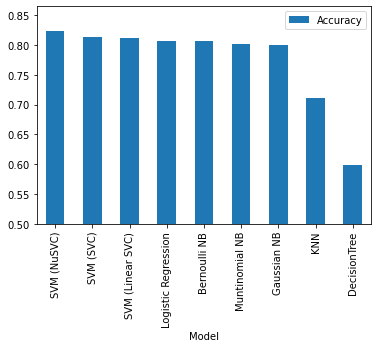

In [16]:
ac=[{'Model': 'KNN', 'Accuracy': knn_acc}, 
    {'Model': 'SVM (SVC)', 'Accuracy': svmsvc_acc},
    {'Model': 'SVM (NuSVC)', 'Accuracy': nusvc_acc},
    {'Model': 'SVM (Linear SVC)', 'Accuracy': svm_lin_acc},
    {'Model': 'Gaussian NB', 'Accuracy': gaussian_acc},
    {'Model': 'Muntinomial NB', 'Accuracy': multinomial_acc},
    {'Model': 'Bernoulli NB', 'Accuracy': bernoulli_acc},
    {'Model': 'DecisionTree', 'Accuracy': tree_acc},
    {'Model': 'Logistic Regression', 'Accuracy': logreg_acc}]
accuracies=pd.DataFrame(ac).sort_values('Accuracy',ascending=False)
accuracies.set_index('Model').plot(kind='bar').set_ylim(bottom=0.5),
accuracies

So model which has the most accuracy in train dataset is SVM (NuSVC) (0.823375). Let's create submission csv for the task

In [17]:
datatest=pd.read_csv('test.csv')
x_test_fin=datatest['text']
pred = cv.transform(x_test_fin)
result=svm_nusvc_grid.predict(pred)
datatest['target']=result
datatest[['id','target']].to_csv('submission.csv',index=False)